In [2]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
okt = Okt()
kkma = Kkma()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re
from collections import Counter

import warnings
warnings.simplefilter("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt


from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# 기초 불용어 처리
from nltk.corpus import stopwords

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 워드 클라우드를 위한 라이브러리
from collections import Counter
# import pytagcloud
from IPython.display import Image

# 저장
import pickle

import json
import ast

In [3]:
# 사이즈 기입

# Grade 긍정 5점, 부정 4점 이하
# Rate 긍정 양수, 부정 음수

# 1) Grade 긍정, Rate 부정  -> 사이즈 언급? 

# 2) Grade 부정, Rate 부정

In [4]:
size_df = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\size_final.xlsx")

In [5]:
# Grade 긍정 Rate 긍정
print(len(size_df[(size_df["Grade"] == 5) & (size_df["Rate"] > 0)]))

# Grade 긍정 Rate 부정
print(len(size_df[(size_df["Grade"] == 5) & (size_df["Rate"] < 0)]))


# Grade 부정 Rate 긍정
print(len(size_df[(size_df["Grade"] < 5) & (size_df["Rate"] > 0)]))

# Grade 부정 Rate 부정
print(len(size_df[(size_df["Grade"] < 5) & (size_df["Rate"] < 0)]))

390
35
94
39


In [44]:
data = {'grade_pos': [390, 35], 'grade_neg': [94, 39]}
temp_df = pd.DataFrame(data, index=['rate_pos', 'rate_neg'])
print(temp_df)

          grade_pos  grade_neg
rate_pos        390         94
rate_neg         35         39


In [6]:
# 1-1) Grade 긍정, Rate 부정  -> 사이즈 언급? 
print(len(size_df[size_df["Grade"] == 5]))
print(len(size_df["Rate"] < 0))

727
1011


In [40]:
# Grade 부정 Rate 긍정 
size_df[(size_df["Grade"] < 5) & (size_df["Rate"] > 0)]

,Unnamed: 0,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,Medium
2,2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,X-Large
4,4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,Medium
11,11,3556338225,idra*******,2023.04.24,4,아주 넉넉하게 입으려면 정사이즈조금 넉넉하게 입으려면 한사이즈 다운맞게 입으려면 두...,"Black (2-pack), XX-Large",0,"['아주', '넉넉하게', '입으려면', '정사', '넉넉하게', '입으려면', '...",2,23,1,XX-Large
14,14,3556338225,박규,2023.03.30,3,쿠폰 소모용 저렴한 의류중에서는 Amazon Essentials만 구매해야함..Gi...,"Dark Heather (2-pack), 2, Large",0,"['쿠폰', '모용', '저렴한', '의류', '에서는', '구매', '해야', '...",5,28,1,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,982,3627279070,하니벼리아빠,2022.07.25,4,품질 좋은 원단에 깔끔한 봉제상태. 가늘면서도 촘촘한 라벤더 칼라 stripes가 ...,"Lavender, Stripe, Large",0,"['품질', '좋은', '원단', '깔끔한', '봉제', '상태', '가늘면서도',...",4,49,1,Large
986,986,3627279070,duck****,2022.10.08,4,"무난한, 저렴한 가격에 좋습니다","Blue, Stripe, X-Large",0,"['무난', '저렴한', '가격', '좋습니다']",4,4,1,X-Large
989,989,3613977935,ㄱㅇㄹ,2023.04.22,3,색감이 좋습니다. 보통 100 사이즈 입는데 팔이 좀 기네요.,"Large, Red/Blue, Plaid","Large, Red/Blue, Plaid","['색감', '좋습니다', '보통', '사이즈', '입는데', '팔이', '기네']",2,7,1,Large
991,991,3613977935,tomm*****,2021.09.14,4,배송 빠르고 좋습니다.,"Navy, X-Large",0,"['배송', '빠르고', '좋습니다']",4,3,1,X-Large


In [41]:
grade_neg_rate_pos = size_df[(size_df["Grade"] < 5) & (size_df["Rate"] > 0)]

In [42]:
len(grade_neg_rate_pos)

94

In [45]:
grade_neg_rate_pos


,Unnamed: 0,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,Medium
2,2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,X-Large
4,4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,Medium
11,11,3556338225,idra*******,2023.04.24,4,아주 넉넉하게 입으려면 정사이즈조금 넉넉하게 입으려면 한사이즈 다운맞게 입으려면 두...,"Black (2-pack), XX-Large",0,"['아주', '넉넉하게', '입으려면', '정사', '넉넉하게', '입으려면', '...",2,23,1,XX-Large
14,14,3556338225,박규,2023.03.30,3,쿠폰 소모용 저렴한 의류중에서는 Amazon Essentials만 구매해야함..Gi...,"Dark Heather (2-pack), 2, Large",0,"['쿠폰', '모용', '저렴한', '의류', '에서는', '구매', '해야', '...",5,28,1,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,982,3627279070,하니벼리아빠,2022.07.25,4,품질 좋은 원단에 깔끔한 봉제상태. 가늘면서도 촘촘한 라벤더 칼라 stripes가 ...,"Lavender, Stripe, Large",0,"['품질', '좋은', '원단', '깔끔한', '봉제', '상태', '가늘면서도',...",4,49,1,Large
986,986,3627279070,duck****,2022.10.08,4,"무난한, 저렴한 가격에 좋습니다","Blue, Stripe, X-Large",0,"['무난', '저렴한', '가격', '좋습니다']",4,4,1,X-Large
989,989,3613977935,ㄱㅇㄹ,2023.04.22,3,색감이 좋습니다. 보통 100 사이즈 입는데 팔이 좀 기네요.,"Large, Red/Blue, Plaid","Large, Red/Blue, Plaid","['색감', '좋습니다', '보통', '사이즈', '입는데', '팔이', '기네']",2,7,1,Large
991,991,3613977935,tomm*****,2021.09.14,4,배송 빠르고 좋습니다.,"Navy, X-Large",0,"['배송', '빠르고', '좋습니다']",4,3,1,X-Large


In [46]:
grade_neg_rate_pos.head()

,Unnamed: 0,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,Medium
2,2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,X-Large
4,4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,Medium
11,11,3556338225,idra*******,2023.04.24,4,아주 넉넉하게 입으려면 정사이즈조금 넉넉하게 입으려면 한사이즈 다운맞게 입으려면 두...,"Black (2-pack), XX-Large",0,"['아주', '넉넉하게', '입으려면', '정사', '넉넉하게', '입으려면', '...",2,23,1,XX-Large
14,14,3556338225,박규,2023.03.30,3,쿠폰 소모용 저렴한 의류중에서는 Amazon Essentials만 구매해야함..Gi...,"Dark Heather (2-pack), 2, Large",0,"['쿠폰', '모용', '저렴한', '의류', '에서는', '구매', '해야', '...",5,28,1,Large


In [47]:
grade_neg_rate_pos.reset_index()

,index,Unnamed: 0,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,0,0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,Medium
1,2,2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,X-Large
2,4,4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,Medium
3,11,11,3556338225,idra*******,2023.04.24,4,아주 넉넉하게 입으려면 정사이즈조금 넉넉하게 입으려면 한사이즈 다운맞게 입으려면 두...,"Black (2-pack), XX-Large",0,"['아주', '넉넉하게', '입으려면', '정사', '넉넉하게', '입으려면', '...",2,23,1,XX-Large
4,14,14,3556338225,박규,2023.03.30,3,쿠폰 소모용 저렴한 의류중에서는 Amazon Essentials만 구매해야함..Gi...,"Dark Heather (2-pack), 2, Large",0,"['쿠폰', '모용', '저렴한', '의류', '에서는', '구매', '해야', '...",5,28,1,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,982,982,3627279070,하니벼리아빠,2022.07.25,4,품질 좋은 원단에 깔끔한 봉제상태. 가늘면서도 촘촘한 라벤더 칼라 stripes가 ...,"Lavender, Stripe, Large",0,"['품질', '좋은', '원단', '깔끔한', '봉제', '상태', '가늘면서도',...",4,49,1,Large
90,986,986,3627279070,duck****,2022.10.08,4,"무난한, 저렴한 가격에 좋습니다","Blue, Stripe, X-Large",0,"['무난', '저렴한', '가격', '좋습니다']",4,4,1,X-Large
91,989,989,3613977935,ㄱㅇㄹ,2023.04.22,3,색감이 좋습니다. 보통 100 사이즈 입는데 팔이 좀 기네요.,"Large, Red/Blue, Plaid","Large, Red/Blue, Plaid","['색감', '좋습니다', '보통', '사이즈', '입는데', '팔이', '기네']",2,7,1,Large
92,991,991,3613977935,tomm*****,2021.09.14,4,배송 빠르고 좋습니다.,"Navy, X-Large",0,"['배송', '빠르고', '좋습니다']",4,3,1,X-Large


In [48]:
grade_neg_rate_pos.index

Int64Index([  0,   2,   4,  11,  14,  20,  23,  26,  30,  31,  40,  55,  70,
             75,  85,  86,  92,  93, 108, 119, 136, 138, 140, 143, 157, 159,
            193, 200, 203, 205, 239, 275, 278, 280, 283, 288, 308, 315, 330,
            332, 350, 357, 379, 384, 387, 416, 423, 427, 444, 449, 450, 462,
            473, 482, 505, 518, 538, 554, 557, 567, 568, 569, 574, 575, 583,
            589, 604, 605, 609, 610, 634, 652, 665, 714, 768, 782, 789, 790,
            814, 823, 824, 831, 832, 838, 857, 880, 917, 949, 951, 982, 986,
            989, 991, 992],
           dtype='int64')

In [49]:
grade_neg_rate_pos=grade_neg_rate_pos.drop('Unnamed: 0' , axis =1)

In [50]:
grade_neg_rate_pos = grade_neg_rate_pos.reset_index()

In [51]:
grade_neg_rate_pos.columns

Index(['index', 'ProductNum', 'ID', 'Date', 'Grade', 'Text', 'Option', 'Size',
       'FilteredText', 'Rate', 'FilteredLen', 'count', 'Option_Size'],
      dtype='object')

In [52]:
len(grade_neg_rate_pos)

94

In [53]:
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

In [54]:
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)
nouns = grade_neg_rate_pos['Text'].apply(lambda x: kkma.nouns(str(x)))
nouns

0     [쿠폰, 2, 2만원정도, 만, 원, 정도, 6, 6벌이면, 벌, 이면, 만큼, 마...
1                          [브랜드, 면, 줄기, 여름, 구매, 감사, 수고]
2     [생각, 정, 정사이즈, 사이즈, 거, 라지, 미듐샀더니가슴둘레, 타이트, 타이트합...
3     [면, 정, 정사이즈, 사이즈, 한, 한사이즈, 다운, 두, 두사이즈, 다운해야겠네...
4     [쿠폰, 소모, 의류, 의류중, 중, 구매, 함, 건, 퀄리티, 국내, 판매, 무지...
                            ...                        
89    [품질, 원단, 봉제, 봉제상태, 상태, 라벤더, 칼라, 고급, 한가지, 점, 상품...
90                                                 [가격]
91                                [색감, 보통, 100, 사이즈, 팔]
92                                                 [배송]
93                                                 [배송]
Name: Text, Length: 94, dtype: object

In [55]:
nouns = nouns.explode()
nouns

0        쿠폰
0         2
0     2만원정도
0         만
0         원
      ...  
91      100
91      사이즈
91        팔
92       배송
93       배송
Name: Text, Length: 1095, dtype: object

In [56]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word.word=df_word.word.astype(str)
df_word = df_word.query('count > = 2')
df_word 

,word,count
0,쿠폰,2.0
0,2만원정도,5.0
0,정도,2.0
0,6벌이면,4.0
0,이면,2.0
...,...,...
91,보통,2.0
91,100,3.0
91,사이즈,3.0
92,배송,2.0


In [57]:
size_exist=df_word.index[df_word["word"]=="사이즈"].tolist()

In [58]:
print(size_exist)

[2, 3, 6, 7, 8, 9, 10, 18, 19, 20, 21, 24, 26, 27, 31, 34, 41, 43, 46, 57, 64, 65, 66, 70, 73, 74, 75, 76, 78, 79, 81, 82, 83, 87, 89, 91]


In [59]:
len(size_exist)

36

In [60]:
temp = grade_neg_rate_pos.loc[size_exist,:].drop('index',axis=1)

In [62]:
temp.to_excel("grade_neg_rate_pos.xlsx")

In [31]:
grade_p_rate_n = size_df[(size_df["Grade"] == 5) & (size_df["Rate"] < 0)]

In [32]:
len(grade_p_rate_n)

35

In [33]:
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)
nouns = grade_p_rate_n['Text'].apply(lambda x: kkma.nouns(str(x)))
nouns

13     [티셔츠, 헤비, 헤비코튼, 코튼, 통, 주의, 주의하세, 하세, 대신, 기장, 편...
15     [아마존, 해외, 해외배송, 배송, 옷, 생각, 미국, 기상, 수, ㄷ, ㄷㄷ홈웨어...
18     [성비, 값, 값색깔, 색깔, 화면, 그대, 로에, 사이즈, 건조기, 꺼, 마감, ...
21                             [생각, 마감, 마감처리, 처리, 기장, 거]
28     [사이즈, 3, 주문, 국내, 130, 평, 평상시, 상시, 다님, 가슴, 가슴둘레...
47     [2, 2천, 천, ㄲ, ㄲㅈ, ㅈ, 침, 수, 이상은, 15, 15수미만, 수, ...
71     [2, 우리, 우리나라, 나라, 사이즈, 11, 11번가덕, 번, 가덕, 직구, 참...
99     [미국, 유학, 유학시절, 시절, 인스, 런닝, 11, 11번가, 번가, 배송, 총...
107    [년, 사이, 칼, 칼하트, 하트, 긴팔, 반팔, 10, 10장, 장, 이상, 올해...
128                       [배송, 5, 5일만, 일, 만, 사, 사이즈, 이즈]
130    [때, 100, 코튼, 표기, 거, 폴리에스터, 35, 혼방, 7, 라지, 라지사이...
134                        [라지, 분, 겐, 버스, 지하철, 기, 때, 불편]
146                              [기모, 사이즈, 후드, 2, 2개, 개]
173            [176, 100, 100키로이상, 키로, 이상, 돼지, 3, 2, 만족]
230    [배송, 생각, 어깨, 품, 덩치, 평소, 한국, 사이즈, 105, 110, 외국,...
234    [1, 가슴, 가슴둘레, 둘레, 단면, 단면67cm2, 67, cm2, 목, 터, ...
235    [품질, 한국사리즈, 2, 2사이즈, 사이즈, 한국, 110, 분, 100, 100...
249    [스웨트셔츠, 근본, 브랜드, 하나쯤, 사두

In [34]:
nouns = nouns.explode()
nouns

13         티셔츠
13          헤비
13        헤비코튼
13          코튼
13           통
        ...   
825     폴리에스테르
825    폴리에스테르여
825       에스테르
825          여
825        오리털
Name: Text, Length: 538, dtype: object

In [35]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word.word=df_word.word.astype(str)
df_word = df_word.query('count > = 2')
df_word 

,word,count
13,티셔츠,3
13,헤비,2
13,헤비코튼,4
13,코튼,2
13,주의,2
...,...,...
825,폴리,2
825,폴리에스테르,6
825,폴리에스테르여,7
825,에스테르,4


In [36]:
size_exist=df_word.index[df_word["word"]=="사이즈"].tolist()

In [37]:
len(size_exist)

17

# Grade, Rate, FilteredLen 상관관계

In [27]:
size_df.columns

Index(['Unnamed: 0', 'ProductNum', 'ID', 'Date', 'Grade', 'Text', 'Option',
       'Size', 'FilteredText', 'Rate', 'FilteredLen', 'count', 'Option_Size'],
      dtype='object')

In [28]:
size_df_heatmap =size_df.drop('Unnamed: 0', axis =1 )


In [29]:
size_df_heatmap =size_df_heatmap .drop('ProductNum', axis =1 )

In [30]:
size_df_heatmap =size_df_heatmap .drop('ID', axis =1 )

In [31]:
size_df_heatmap =size_df_heatmap .drop('Date', axis =1 )

In [32]:
size_df_heatmap =size_df_heatmap .drop('Text', axis =1 )

In [33]:
size_df_heatmap =size_df_heatmap .drop('Size', axis =1 )

In [34]:
size_df_heatmap =size_df_heatmap .drop('FilteredText', axis =1 )

In [35]:
size_df_heatmap =size_df_heatmap .drop('count', axis =1 )

In [36]:
size_df_heatmap =size_df_heatmap .drop('Option_Size', axis =1 )

In [37]:
size_df_heatmap =size_df_heatmap .drop('Option', axis =1 )

In [38]:
size_df_heatmap.head()

,Grade,Rate,FilteredLen
0,4,2,18
1,5,2,10
2,4,2,13
3,5,1,8
4,3,2,20


<Axes: >

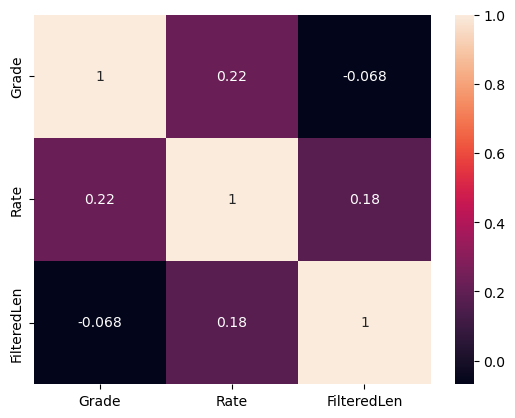

In [39]:

sns.heatmap(size_df_heatmap.corr(), annot = True)